## 실습리포트10



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import zipfile
import os
import matplotlib.pyplot as plt

In [ ]:
#데이터 생성

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-22 03:36:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 74.125.20.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   208MB/s    in 0.3s    

2023-11-22 03:36:28 (208 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
#압축해제

zip_ref=zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall()
zip_ref.close()


### 개와 고양이 분류 문제

- 문제: 개와 고양이를 구분하는 문제

- 실행결과: 성능은 약 73.6% 정도로, tranining data가 2000개밖에 안되기 때문에 성능이 저조한 것을 확인할 수 있다.

In [ ]:
#디렉토리 설정

base_dir = 'cats_and_dogs_filtered'

train_dir=os.path.join(base_dir, 'train')  #첫번째 디렉토리 생성
validation_dir=os.path.join(base_dir, 'validation')

train_cats_dir=os.path.join(train_dir, 'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')

validation_cats_dir=os.path.join(validation_dir, 'cats')
validation_dogs_dir=os.path.join(validation_dir, 'dogs')

In [ ]:
#이미지 확인

train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.655.jpg', 'cat.908.jpg', 'cat.333.jpg', 'cat.625.jpg', 'cat.27.jpg']
['dog.627.jpg', 'dog.768.jpg', 'dog.55.jpg', 'dog.737.jpg', 'dog.162.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


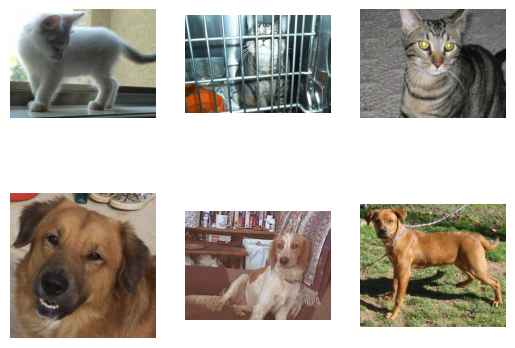

In [ ]:
#이미지 확인

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[0:3]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[0:3]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  plt.subplot(2, 3, i+1)
  plt.axis('Off')
  img = plt.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
#w정규화(나중에 필요)

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#데이터 생성

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#모델 정의

model=Sequential ([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
#모델 컴파일

RMSprop=keras.optimizers.RMSprop(0.001)
model.compile(optimizer=RMSprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 훈련

history=model.fit( train_generator,
                   steps_per_epoch=100,
                   validation_data=validation_generator,
                   validation_steps=50,
                   epochs=50,
                   verbose=1)

Epoch 1/50
100/100 [==============================] - 19s 88ms/step - loss: 0.7498 - accuracy: 0.5020 - val_loss: 0.6923 - val_accuracy: 0.5280
Epoch 2/50
100/100 [==============================] - 7s 66ms/step - loss: 0.6967 - accuracy: 0.5455 - val_loss: 0.6690 - val_accuracy: 0.5570
Epoch 3/50
100/100 [==============================] - 5s 51ms/step - loss: 0.6246 - accuracy: 0.6490 - val_loss: 0.5754 - val_accuracy: 0.7110
Epoch 4/50
100/100 [==============================] - 6s 64ms/step - loss: 0.5648 - accuracy: 0.7185 - val_loss: 0.5574 - val_accuracy: 0.7240
Epoch 5/50
100/100 [==============================] - 5s 51ms/step - loss: 0.5143 - accuracy: 0.7475 - val_loss: 0.5843 - val_accuracy: 0.7010
Epoch 6/50
100/100 [==============================] - 5s 51ms/step - loss: 0.4589 - accuracy: 0.7885 - val_loss: 0.5769 - val_accuracy: 0.7230
Epoch 7/50
100/100 [==============================] - 5s 55ms/step - loss: 0.4062 - accuracy: 0.8080 - val_loss: 0.6010 - val_accuracy: 0.722

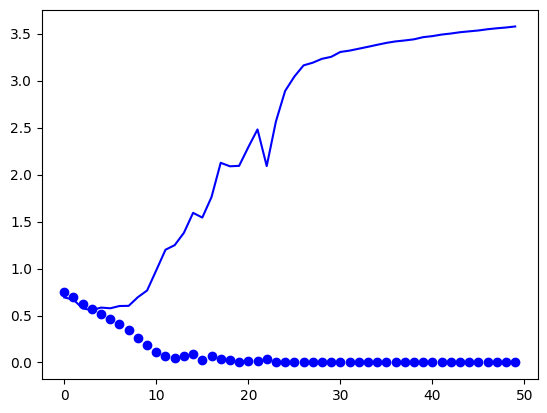

In [ ]:
#모델 평가

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(loss, 'bo')
plt.plot(val_loss, 'b')
plt.show()

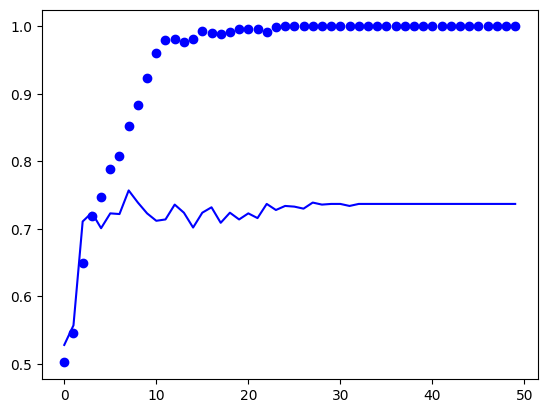

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(acc, 'bo')
plt.plot(val_acc, 'b')
plt.show()


### 개와 고양이 분류 문제 with Augmentation

- 문제: 개와 고양이를 구분하는 문제에서 data augmentation을 적용한 모델로 문제 해결하기

- 실행결과: 정확도가 약 80% 내외로, 다음 그래프와 같이 augmentation 이전 정확도보다 훨씬 높아졌음을 알 수 있다.

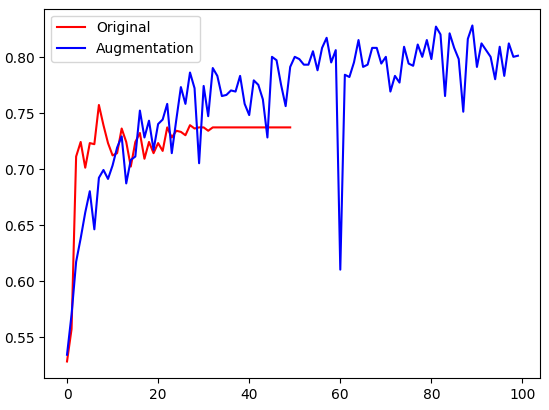

In [ ]:
#image augmentation

train_datagen_aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_datagen_aug = ImageDataGenerator(rescale=1./255)

In [ ]:
#데이터 생성_Augmentation

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator_aug=test_datagen_aug.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#모델 정의_Augmentation

model_aug=Sequential ([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_aug.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
#모델 컴파일_augmentation

RMSprop=keras.optimizers.RMSprop(0.001)
model_aug.compile(optimizer=RMSprop,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 훈련

history_aug=model_aug.fit(train_generator_aug,
                  steps_per_epoch=100,
                  validation_data=validation_generator_aug,
                  validation_steps=50,
                  epochs=100,
                  verbose=1)

Epoch 1/100
100/100 [==============================] - 17s 159ms/step - loss: 0.7318 - accuracy: 0.5130 - val_loss: 0.6690 - val_accuracy: 0.5340
Epoch 2/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6826 - accuracy: 0.5610 - val_loss: 0.6673 - val_accuracy: 0.5700
Epoch 3/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6749 - accuracy: 0.5850 - val_loss: 0.6500 - val_accuracy: 0.6170
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6466 - accuracy: 0.6230 - val_loss: 0.6305 - val_accuracy: 0.6380
Epoch 5/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6348 - accuracy: 0.6475 - val_loss: 0.6111 - val_accuracy: 0.6610
Epoch 6/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6165 - accuracy: 0.6585 - val_loss: 0.5902 - val_accuracy: 0.6800
Epoch 7/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6131 - accuracy: 0.6345 - val_loss: 0.6495 -

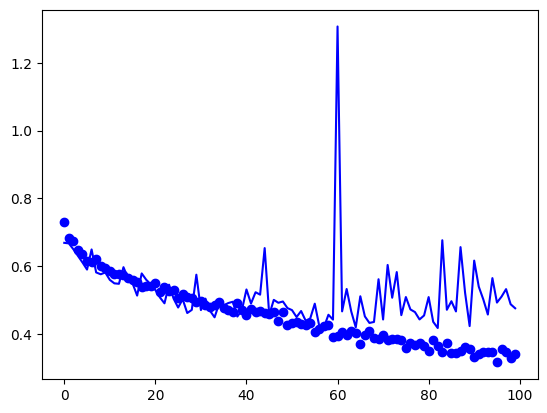

In [ ]:
#모델 평가

loss_aug=history_aug.history['loss']
val_loss_aug=history_aug.history['val_loss']

plt.plot(loss_aug, 'bo')
plt.plot(val_loss_aug, 'b')
plt.show()

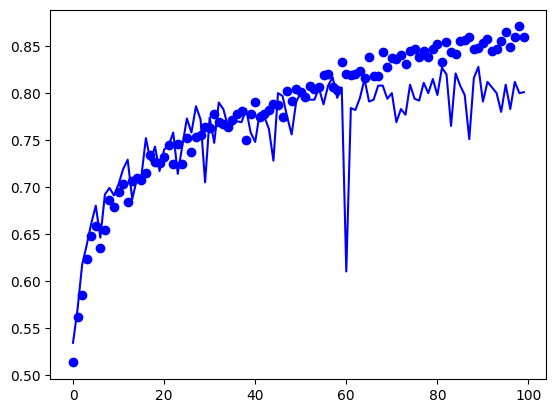

In [ ]:
acc_aug=history_aug.history['accuracy']
val_acc_aug=history_aug.history['val_accuracy']

plt.plot(acc_aug, 'bo')
plt.plot(val_acc_aug, 'b')
plt.show()

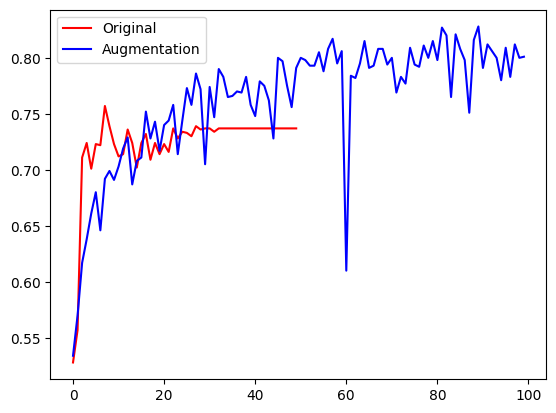

In [ ]:
plt.plot(val_acc, 'r', label='Original')
plt.plot(val_acc_aug, 'b', label='Augmentation')
plt.legend()
plt.show()